<a href="https://colab.research.google.com/github/DurvaDiwanji05/Machine-learning-proj/blob/main/ML_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly

Import dataset and libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
loan_data=pd.read_csv("/loan_data.csv",index_col='Loan_ID')
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Statistical analysis

In [ ]:
import statistics

In [ ]:
m=loan_data['ApplicantIncome'].mean()
print('Mean of Applicant Income is:',m)

Mean of Applicant Income is: 3579.845144356955


In [ ]:
md = loan_data['CoapplicantIncome'].median()
print('Median of Co-applicant Income is:',md)

Median of Co-applicant Income is: 983.0


In [ ]:
mode = loan_data['Credit_History'].mode()
print('Mode of Credit History',mode)

Mode of Credit History 0    1.0
Name: Credit_History, dtype: float64


In [ ]:
range = loan_data['LoanAmount'].max() - loan_data['LoanAmount'].min()
print('The range of Loan Amount is:',range)

The range of Loan Amount is: 141.0


In [ ]:
var = loan_data['ApplicantIncome'].var()
print('Variance of Applicant Income:',var)

Variance of Applicant Income: 2015871.2785882028


In [ ]:
st_dev = loan_data['ApplicantIncome'].std()
print('Standard Deviation of Applicant Income:',st_dev)

Standard Deviation of Applicant Income: 1419.8138182832997


Pre-processing

In [ ]:
loan_data.shape
loan_data.columns
loan_data.dtypes
loan_data.info()
loan_data[loan_data.duplicated()==True] # no duplicated data
loan_data.describe().T

#missing values
loan_data.isnull().values.any()
loan_data.isnull().sum()

def missing_data(data):
  total=data.isnull().sum().sort_values(ascending=False)
  percent=(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
  return pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data(loan_data)

#null values
loan_data=loan_data.dropna()
loan_data.info()

col_loan_data=list(loan_data.select_dtypes(include='object'))
for name in loan_data[col_loan_data]:
  print("Unique values for %s:" %name,loan_data[name].unique())
print('\n')


<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, LP001003 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 38.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, LP001003 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  D

Visualization

In [ ]:
# Gender distribution
gender=loan_data['Gender'].value_counts().to_frame().reset_index().rename(columns={'index':'Gender','Gender':'Count'})
pplot=go.Figure([go.Pie(labels=gender['Gender'],values=gender['Count'])])
pplot.update_traces(hoverinfo='label+percent',textinfo='value+percent',textfont_size=12)
pplot.update_layout(title='Gender Count',title_x=0.5)
pplot.show()

In [ ]:
#Marriage distribution
mdist=loan_data.groupby(by=['Gender','Married'])['Dependents'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Married':'Married','Dependents':'Count'})
mdist
bplot=px.bar(mdist,x='Married',y='Count',color='Gender')
bplot.update_layout(title_text='Married Count With Gender',title_x=0.5)
bplot.show()



In [ ]:
#distribution of applicant income
hplot=go.Figure(data=[go.Histogram(x=loan_data['ApplicantIncome'],
                marker_color='Crimson',xbins=dict(start=0,end=25000,size=1000))])
hplot.update_layout(title='Distribution of Applicant Income',xaxis_title='ApplicantIncome',yaxis_title='Counts',title_x=0.5)
hplot.show()

In [ ]:
#location of the house
property_area=loan_data['Property_Area'].value_counts().to_frame().reset_index().rename(columns={'index':'Property_Area','Property_Area':'Count'})
fig=go.Figure(data=[go.Scatter(x=property_area['Property_Area'],y=property_area['Count'],
                               mode='markers',
                               marker=dict(
                                   color=property_area['Count'],
                                   size=property_area['Count']*0.3,
                                   showscale=True
                               ))])
fig.update_layout(title='Property_Area',xaxis_title='Property_Area',yaxis_title='Number of Property',title_x=0.5)
fig.show()

In [ ]:
#scatter plot
fig=px.scatter(loan_data,x='ApplicantIncome',y='LoanAmount',color='Property_Area')
fig.update_layout(title='Applicant Income Vs Loan Amount with Property Area',xaxis_title='Applicant Income',yaxis_title='Loan Amount',title_x=0.5)
fig.show()

In [ ]:
df_loan_data=loan_data.copy()
df_loan_data['Dependents']=df_loan_data['Dependents'].replace('3+','3')

Gender_map={'Male':0,'Female':1}
Married_map={'Yes':1,'No':0}
Education_map={'Graduate':1,'Not Graduate':0}
Self_Employed_map={'Yes':1,'No':0}
Property_Area_map={'Rural':1,'Urban':0,'Semiurban':0}
Loan_Status_map={'N':0,'Y':1}

df_loan_data['Gender']=df_loan_data['Gender'].map(Gender_map)
df_loan_data['Married']=df_loan_data['Married'].map(Married_map)
df_loan_data['Education']=df_loan_data['Education'].map(Education_map)
df_loan_data['Self_Employed']=df_loan_data['Self_Employed'].map(Self_Employed_map)
df_loan_data['Property_Area']=df_loan_data['Property_Area'].map(Property_Area_map)
df_loan_data['Loan_Status']=df_loan_data['Loan_Status'].map(Loan_Status_map)

df_loan_data
df_loan_data.isnull().sum()
df_loan_data=df_loan_data.dropna()

Apply Machine Learning model

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
y=df_loan_data.Loan_Status
X=df_loan_data.drop('Loan_Status',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (246, 11)
y_train: (246,)
X_test: (62, 11)
y_test: (62,)


Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.83      0.50      0.62        20
           1       0.80      0.95      0.87        42

    accuracy                           0.81        62
   macro avg       0.82      0.73      0.75        62
weighted avg       0.81      0.81      0.79        62

Training Accuracy: 0.8455284552845529
Testing Accuracy: 0.8064516129032258
TP: 40
FN: 2
FP: 10
TN: 10
Precision: 0.8
Recall Score: 0.9523809523809523
F1 score: 0.8695652173913043


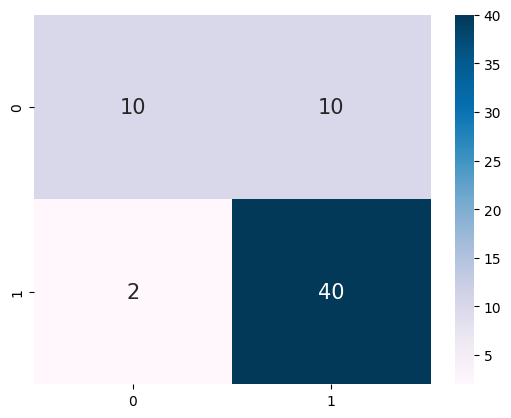

In [ ]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor_model=lor.fit(X_train,y_train)
lor_model

y_pred_lor=lor_model.predict(X_test)
accuracy_score=(y_test,y_pred_lor)

#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred_lor)
sns.heatmap(cm,annot=True,annot_kws={'size':15},cmap='PuBu')

#classification report
print(classification_report(y_test,y_pred_lor))

print('Training Accuracy:',lor_model.score(X_train,y_train))
print('Testing Accuracy:',lor_model.score(X_test,y_test))

# evaluation metrics
def find_TP(y,y_p):
  return sum((y==1) & (y_p==1))
def find_FN(y,y_p):
  return sum((y==1) & (y_p==0))
def find_FP(y,y_p):
  return sum((y==0) & (y_p==1))
def find_TN(y,y_p):
  return sum((y==0) & (y_p==0))

TP=find_TP(y_test,y_pred_lor)
FN=find_FN(y_test,y_pred_lor)
FP=find_FP(y_test,y_pred_lor)
TN=find_TN(y_test,y_pred_lor)
print('TP:',TP)
print('FN:',FN)
print('FP:',FP)
print('TN:',TN)
prec=TP/(TP+FP)
print('Precision:',prec)
recall=TP/(TP+FN)
print('Recall Score:',recall)
f1_score=2*((prec*recall)/(prec+recall))
print('F1 score:',f1_score)

KNN model

              precision    recall  f1-score   support

           0       0.62      0.40      0.48        20
           1       0.76      0.88      0.81        42

    accuracy                           0.73        62
   macro avg       0.69      0.64      0.65        62
weighted avg       0.71      0.73      0.71        62

Training Accuracy: 0.7398373983739838
Testing Accuracy: 0.7258064516129032
TP: 37
FN: 5
FP: 12
TN: 8
Precision: 0.7551020408163265
Recall Score: 0.8809523809523809
F1 score: 0.8131868131868131


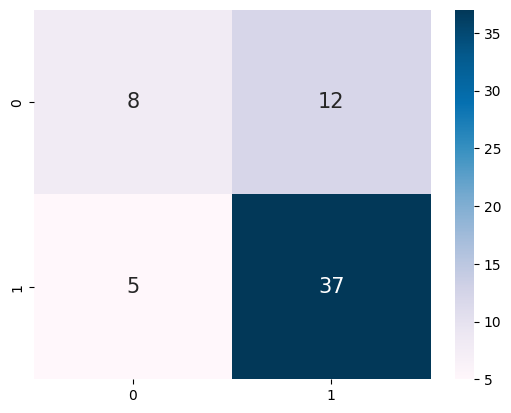

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train,y_train)
knn_model

y_pred_knn=knn_model.predict(X_test)
accuracy_score=(y_test,y_pred_knn)

#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm,annot=True,annot_kws={'size':15},cmap='PuBu')

#classification report
print(classification_report(y_test,y_pred_knn))

print('Training Accuracy:',knn_model.score(X_train,y_train))
print('Testing Accuracy:',knn_model.score(X_test,y_test))


# evaluation metrics
def find_TP(y,y_p):
  return sum((y==1) & (y_p==1))
def find_FN(y,y_p):
  return sum((y==1) & (y_p==0))
def find_FP(y,y_p):
  return sum((y==0) & (y_p==1))
def find_TN(y,y_p):
  return sum((y==0) & (y_p==0))

TP=find_TP(y_test,y_pred_knn)
FN=find_FN(y_test,y_pred_knn)
FP=find_FP(y_test,y_pred_knn)
TN=find_TN(y_test,y_pred_knn)
print('TP:',TP)
print('FN:',FN)
print('FP:',FP)
print('TN:',TN)
prec=TP/(TP+FP)
print('Precision:',prec)
recall=TP/(TP+FN)
print('Recall Score:',recall)
f1_score=2*((prec*recall)/(prec+recall))
print('F1 score:',f1_score)

Decision tree

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.68      1.00      0.81        42

    accuracy                           0.68        62
   macro avg       0.34      0.50      0.40        62
weighted avg       0.46      0.68      0.55        62

Training Accuracy: 0.7195121951219512
Testing Accuracy: 0.6774193548387096
TP: 42
FN: 0
FP: 20
TN: 0
Precision: 0.6774193548387096
Recall Score: 1.0
F1 score: 0.8076923076923077


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



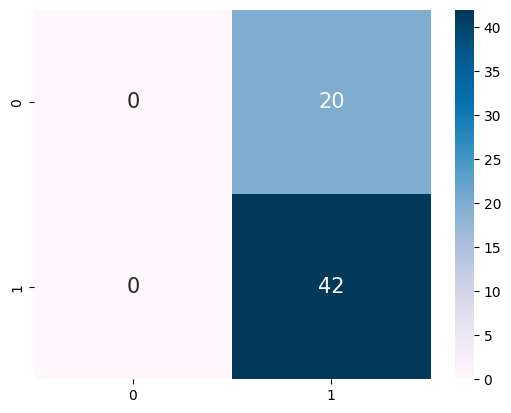

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dectree=DecisionTreeClassifier(max_depth=3,min_samples_leaf=35)
dectree_model=dectree.fit(X_train,y_train)
dectree_model

y_pred_dt=dectree_model.predict(X_test)
accuracy_score=(y_test,y_pred_dt)

#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm,annot=True,annot_kws={'size':15},cmap='PuBu')

#classification report
print(classification_report(y_test,y_pred_dt))

print('Training Accuracy:',dectree_model.score(X_train,y_train))
print('Testing Accuracy:',dectree_model.score(X_test,y_test))

# evaluation metrics
def find_TP(y,y_p):
  return sum((y==1) & (y_p==1))
def find_FN(y,y_p):
  return sum((y==1) & (y_p==0))
def find_FP(y,y_p):
  return sum((y==0) & (y_p==1))
def find_TN(y,y_p):
  return sum((y==0) & (y_p==0))

TP=find_TP(y_test,y_pred_dt)
FN=find_FN(y_test,y_pred_dt)
FP=find_FP(y_test,y_pred_dt)
TN=find_TN(y_test,y_pred_dt)
print('TP:',TP)
print('FN:',FN)
print('FP:',FP)
print('TN:',TN)
prec=TP/(TP+FP)
print('Precision:',prec)
recall=TP/(TP+FN)
print('Recall Score:',recall)
f1_score=2*((prec*recall)/(prec+recall))
print('F1 score:',f1_score)

Random Forest

              precision    recall  f1-score   support

           0       0.85      0.55      0.67        20
           1       0.82      0.95      0.88        42

    accuracy                           0.82        62
   macro avg       0.83      0.75      0.77        62
weighted avg       0.83      0.82      0.81        62

Training Accuracy: 1.0
Testing Accuracy: 0.8225806451612904
TP: 40
FN: 2
FP: 9
TN: 11
Precision: 0.8163265306122449
Recall Score: 0.9523809523809523
F1 score: 0.8791208791208791


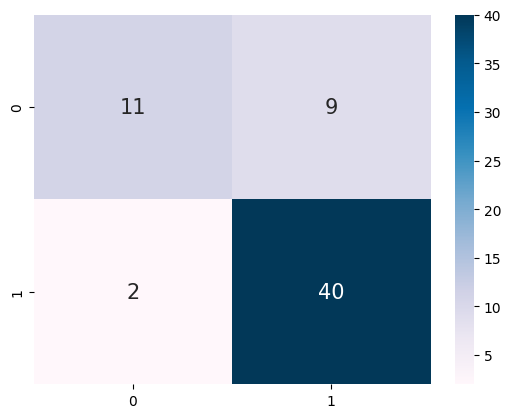

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfor=RandomForestClassifier()
rfor_model=rfor.fit(X_train,y_train)
rfor_model

y_pred_rf=rfor_model.predict(X_test)
accuracy_score=(y_test,y_pred_rf)

#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True,annot_kws={'size':15},cmap='PuBu')

#classification report
print(classification_report(y_test,y_pred_rf))

print('Training Accuracy:',rfor_model.score(X_train,y_train))
print('Testing Accuracy:',rfor_model.score(X_test,y_test))


# evaluation metrics
def find_TP(y,y_p):
  return sum((y==1) & (y_p==1))
def find_FN(y,y_p):
  return sum((y==1) & (y_p==0))
def find_FP(y,y_p):
  return sum((y==0) & (y_p==1))
def find_TN(y,y_p):
  return sum((y==0) & (y_p==0))

TP=find_TP(y_test,y_pred_rf)
FN=find_FN(y_test,y_pred_rf)
FP=find_FP(y_test,y_pred_rf)
TN=find_TN(y_test,y_pred_rf)
print('TP:',TP)
print('FN:',FN)
print('FP:',FP)
print('TN:',TN)
prec=TP/(TP+FP)
print('Precision:',prec)
recall=TP/(TP+FN)
print('Recall Score:',recall)
f1_score=2*((prec*recall)/(prec+recall))
print('F1 score:',f1_score)

Model comparison and results

In [ ]:
models=[lor_model,
        knn_model,
        dectree_model,
        rfor_model]

for mod in models:
  nam=mod.__class__.__name__
  y_pred=mod.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  print(nam+':')
  print('Accuracy:{:.4f}'.format(acc))

LogisticRegression:
Accuracy:0.8065
KNeighborsClassifier:
Accuracy:0.7258
DecisionTreeClassifier:
Accuracy:0.6774
RandomForestClassifier:
Accuracy:0.8226


<ipython-input-29-e0285f0d3389>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-29-e0285f0d3389>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-29-e0285f0d3389>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-29-e0285f0d3389>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Text(0.5, 1.0, 'Accuracy ratio')

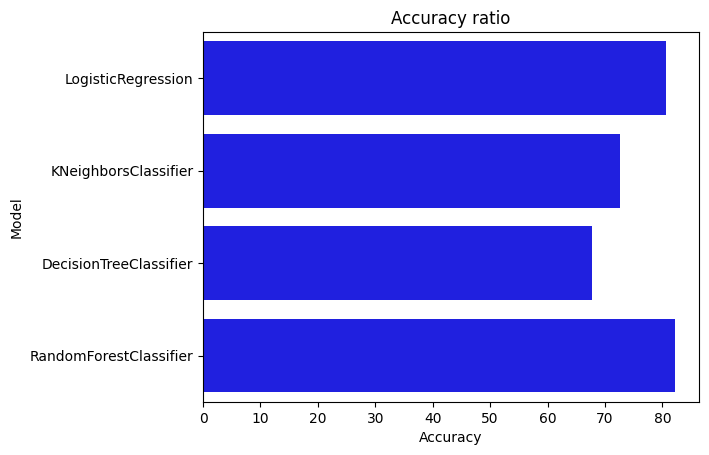

In [ ]:
res = pd.DataFrame(columns=['Model', 'Accuracy'])

for mod in models:
    nam = mod.__class__.__name__
    y_pred = mod.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    res = res.append({'Model': nam, 'Accuracy': acc * 100}, ignore_index=True)

sns.barplot(x='Accuracy', y='Model', data=res, color='b')
plt.xlabel('Accuracy')
plt.title('Accuracy ratio')